# 📐 Transformações Lineares

Este notebook explora o conceito de transformações lineares utilizando álgebra linear com matrizes e vetores. Você aprenderá como aplicar rotações, reflexões, escalas e cisalhamentos usando multiplicação matricial.

---

## 🎯 Objetivos
- Compreender o conceito de transformação linear
- Aplicar transformações usando matrizes
- Visualizar os efeitos sobre vetores no plano 2D


## 🧠 Resumo Conceitual

- Transformações lineares são operações que preservam a origem, retas e proporcionalidade.
- Cada transformação linear pode ser representada por uma **matriz**.
- A multiplicação de uma matriz por um vetor altera esse vetor no espaço.
- Tipos comuns: rotação, escala, cisalhamento, reflexão.


Vetores Originais:
 [[2 1]
 [1 3]]
Vetores Rotacionados:
 [[-1. -3.]
 [ 2.  1.]]


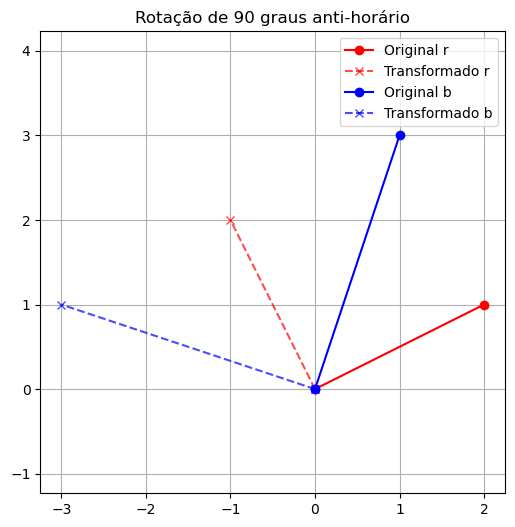

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Vetores Originais
V = np.array([[2, 1],
              [1, 3]])

# Matriz de rotação 90 graus anti-horário
theta = np.radians(90)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# Aplica rotação
V_rotacionado = R @ V

print("Vetores Originais:\n", V)
print("Vetores Rotacionados:\n", V_rotacionado)

plt.figure(figsize=(6,6))

cores = ['r', 'b']  # vermelho e azul

for i in range(V.shape[1]):
    # vetor original
    plt.plot([0, V[0,i]], [0, V[1,i]], color=cores[i], linestyle='-', marker='o', label=f'Original {cores[i]}')
    # vetor rotacionado
    plt.plot([0, V_rotacionado[0,i]], [0, V_rotacionado[1,i]], color=cores[i], linestyle='--', marker='x', alpha=0.7, label=f'Transformado {cores[i]}')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.title('Rotação de 90 graus anti-horário')
plt.show()


### Função `aplicar_transformacao(A, V)`

Essa função encapsula a multiplicação matricial `A @ V`, que é a base da transformação linear.

- `A` é a matriz de transformação (por exemplo: rotação, escala, reflexão etc.).
- `V` é a matriz de vetores (cada coluna é um vetor).
- O resultado é uma nova matriz contendo os vetores transformados.

#### Vantagens de usar a função:
- Código mais organizado e reutilizável
- Facilita testes com diferentes transformações
- Clareza conceitual no estudo


In [2]:
def aplicar_transformacao(A, V):
    """
    Aplica a transformação linear representada pela matriz A
    sobre os vetores da matriz V.

    Parâmetros:
    - A: matriz 2x2 ou 3x3 (dependendo da dimensão dos vetores)
    - V: matriz 2xN ou 3xN contendo N vetores coluna

    Retorna:
    - V_transformado: matriz com os vetores transformados
    """
    return A @ V


In [3]:
def plotar_vetores(vetores_originais, vetores_transformados, cores, titulo):
    """
    Plota vetores 2D originais e transformados em um mesmo gráfico.

    Parâmetros:
    - vetores_originais: matriz 2xN com os vetores originais
    - vetores_transformados: matriz 2xN com os vetores transformados
    - cores: lista de cores para os vetores (ex: ['r', 'b'])
    - titulo: título do gráfico
    """
    plt.figure(figsize=(6, 6))
    ax = plt.gca()
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')
    ax.axhline(0, color='gray', lw=1)
    ax.axvline(0, color='gray', lw=1)

    for i in range(vetores_originais.shape[1]):
        plt.quiver(0, 0,
                   vetores_originais[0, i], vetores_originais[1, i],
                   angles='xy', scale_units='xy', scale=1,
                   color=cores[i], label=f'Original {cores[i]}', alpha=0.5)
        plt.quiver(0, 0,
                   vetores_transformados[0, i], vetores_transformados[1, i],
                   angles='xy', scale_units='xy', scale=1,
                   color=cores[i], label=f'Transformado {cores[i]}')

    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.show()

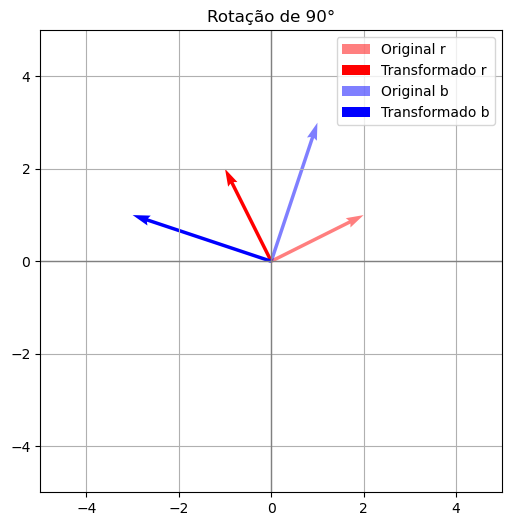

In [4]:
# Vetores originais
v1 = np.array([[2], [1]])
v2 = np.array([[1], [3]])
V = np.hstack([v1, v2])  # Matriz com dois vetores

# Matriz de rotação de 90 graus
theta = np.radians(90)
rotacao = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Aplicar transformação
V_rot = aplicar_transformacao(rotacao, V)

# Plotar
plotar_vetores(V, V_rot, ['r', 'b'], "Rotação de 90°")


## 🔄 Exemplo 2 – Escala

A **escala** aumenta ou diminui o tamanho de um vetor. É uma transformação linear que multiplica os componentes por um fator escalar.

A matriz de escala pode ser diferente para `x` e `y`, como por exemplo:

\[
S = \begin{bmatrix}
2 & 0 \\
0 & 0.5
\end{bmatrix}
\]


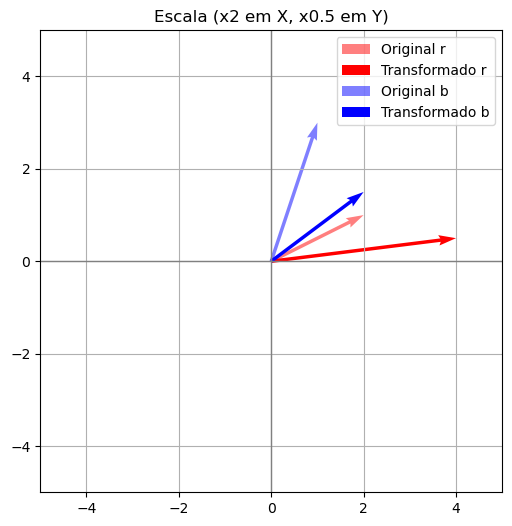

In [5]:
# Matriz de escala (x2 no eixo X, x0.5 no eixo Y)
escala = np.array([
    [2, 0],
    [0, 0.5]
])

# Aplicar escala
V_escala = aplicar_transformacao(escala, V)

# Plotar
plotar_vetores(V, V_escala, ['r', 'b'], "Escala (x2 em X, x0.5 em Y)")


## 🔁 Exemplo 3 – Reflexão

A **reflexão** espelha os vetores em relação a um eixo. A matriz de reflexão no eixo `x` é:

\[
R = \begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
\]

Isso inverte o sinal do componente `y`.


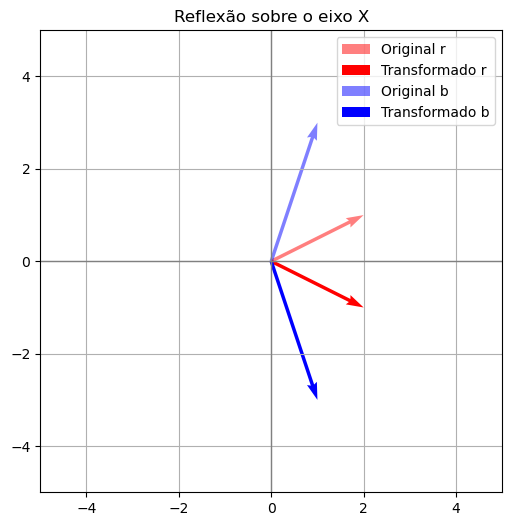

In [6]:
# Matriz de reflexão sobre o eixo X
reflexao = np.array([
    [1, 0],
    [0, -1]
])

# Aplicar reflexão
V_reflexao = aplicar_transformacao(reflexao, V)

# Plotar
plotar_vetores(V, V_reflexao, ['r', 'b'], "Reflexão sobre o eixo X")


## 🧮 Exemplo 4 – Cisalhamento

O **cisalhamento** (shear) desloca os vetores proporcionalmente em uma direção.

Um exemplo de cisalhamento no eixo `x`:

\[
H = \begin{bmatrix}
1 & 1 \\
0 & 1
\end{bmatrix}
\]


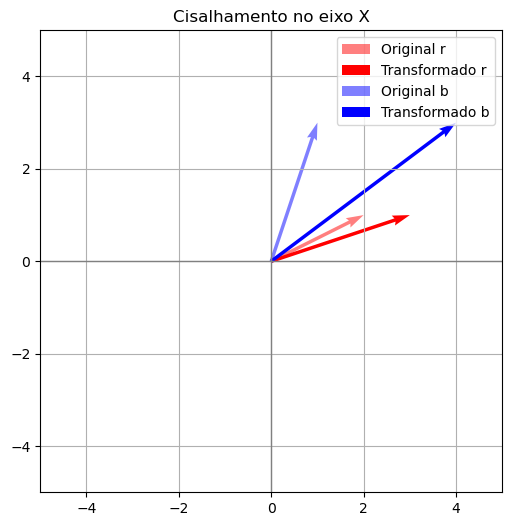

In [7]:
# Matriz de cisalhamento no eixo X
cisalhamento = np.array([
    [1, 1],
    [0, 1]
])

# Aplicar cisalhamento
V_cisalhado = aplicar_transformacao(cisalhamento, V)

# Plotar
plotar_vetores(V, V_cisalhado, ['r', 'b'], "Cisalhamento no eixo X")


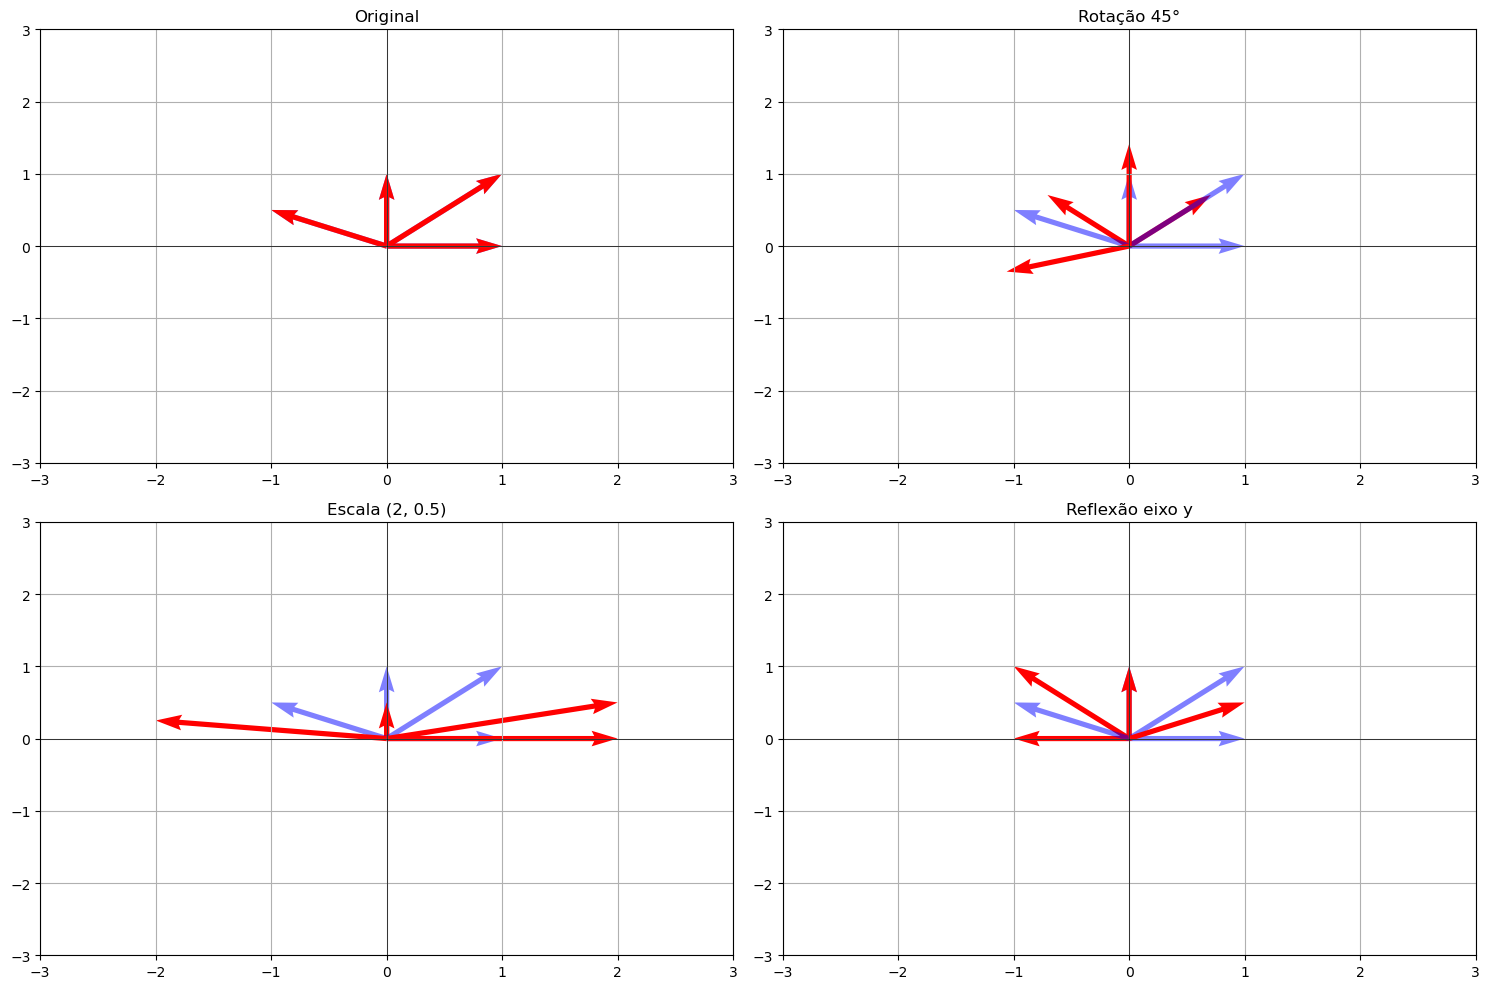

In [8]:
def matrix_rotation(theta):
    theta_rad = np.radians(theta)
    return np.array([
        [np.cos(theta_rad), -np.sin(theta_rad)],
        [np.sin(theta_rad), np.cos(theta_rad)]
    ])
def vertical_shear_matrix(k):
    return np.array([
        [1, 0],
        [k, 1]
    ])
def horizontal_shear_matrix(k):
    return np.array([
        [1, k],
        [0, 1]
    ])

# Criando um conjunto de vetores
vectors = np.array([[1, 0], [0, 1], [1, 1], [-1, 0.5]])

# Definindo transformações
transformations = {
    'Original': np.eye(2),
    'Rotação 45°': matrix_rotation(45),
    'Escala (2, 0.5)': np.array([[2, 0], [0, 0.5]]),
    'Reflexão eixo y': np.array([[-1, 0], [0, 1]])
}

# Plotando
plt.figure(figsize=(15, 10))
for i, (title, T) in enumerate(transformations.items(), 1):
    plt.subplot(2, 2, i)
    for v in vectors:
        v_t = T @ v
        plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)
        plt.quiver(0, 0, v_t[0], v_t[1], angles='xy', scale_units='xy', scale=1, color='r')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.grid()
    plt.title(title)
    plt.axhline(0, color='k', linewidth=0.5)
    plt.axvline(0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

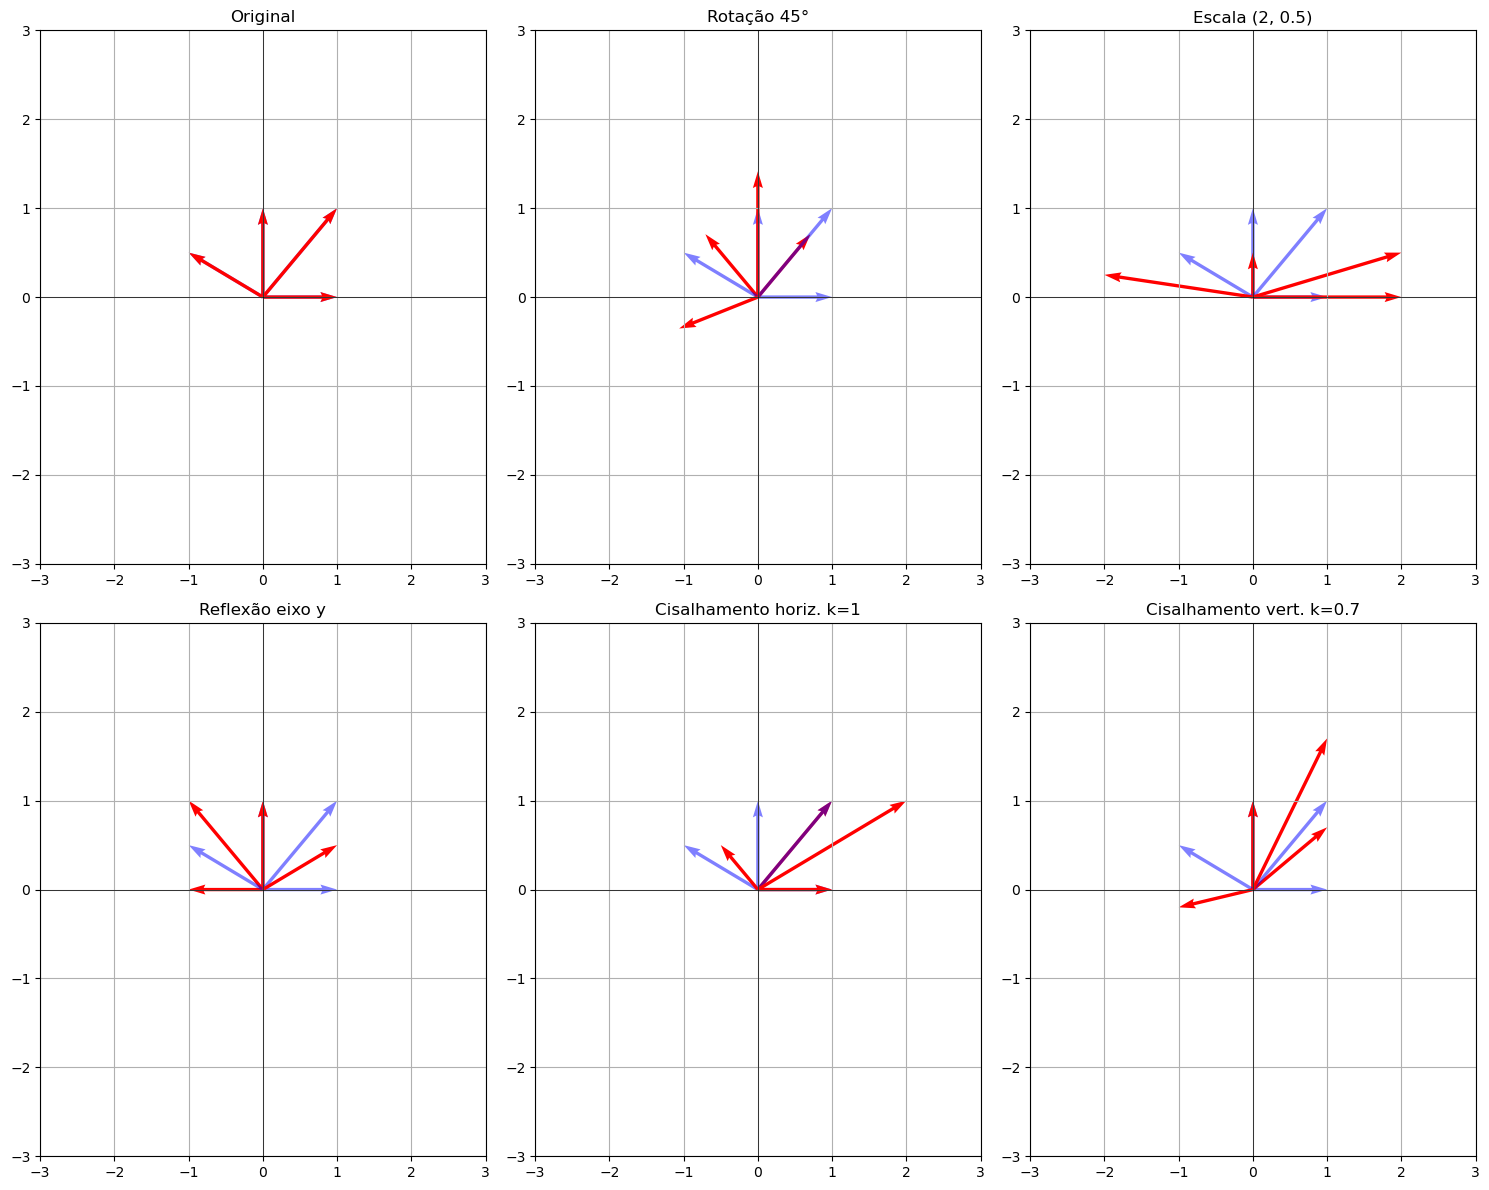

In [9]:
# Criando um conjunto de vetores
vectors = np.array([[1, 0], [0, 1], [1, 1], [-1, 0.5]])

# Adicionando cisalhamento às transformações
transformations = {
    'Original': np.eye(2),
    'Rotação 45°': matrix_rotation(45),
    'Escala (2, 0.5)': np.array([[2, 0], [0, 0.5]]),
    'Reflexão eixo y': np.array([[-1, 0], [0, 1]]),
    'Cisalhamento horiz. k=1': horizontal_shear_matrix(1),
    'Cisalhamento vert. k=0.7': vertical_shear_matrix(0.7)
}

# Plotando
plt.figure(figsize=(15, 12))
for i, (title, T) in enumerate(transformations.items(), 1):
    plt.subplot(2, 3, i)
    for v in vectors:
        v_t = T @ v
        plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)
        plt.quiver(0, 0, v_t[0], v_t[1], angles='xy', scale_units='xy', scale=1, color='r')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.grid()
    plt.title(title)
    plt.axhline(0, color='k', linewidth=0.5)
    plt.axvline(0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

In [10]:
def plot_grid_transformation(matrix, title=""):
    """
    Plota uma grade de pontos e sua transformação por uma matriz.
    """
    matrix = np.array(matrix)

    # Cria uma grade de pontos (um quadrado de -3 a 3)
    x = np.linspace(-3, 3, 10)
    y = np.linspace(-3, 3, 10)
    xx, yy = np.meshgrid(x, y)
    points = np.vstack([xx.ravel(), yy.ravel()])
    
    # Transforma cada ponto da grade
    transformed_points = matrix @ points
    
    # Separa as coordenadas x e y transformadas
    tx = transformed_points[0, :]
    ty = transformed_points[1, :]
    
    # Configuração do plot
    plt.figure(figsize=(6, 6))
    
    # Plota a grade original (cinza)
    plt.scatter(xx, yy, color='gray', s=20, label='Grade Original')
    
    # Plota a grade transformada (vermelho)
    plt.scatter(tx, ty, color='red', s=20, label='Grade Transformada')

    # Configurações visuais
    plt.grid(True, linestyle='--')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    
    max_val = np.max(np.abs(transformed_points)) * 1.1
    plt.xlim(-max_val, max_val)
    plt.ylim(-max_val, max_val)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(title)
    plt.legend()
    plt.show()

# Vamos visualizar o cisalhamento na grade inteira
#plot_grid_transformation(shear_matrix_h, "Efeito do Cisalhamento Horizontal na Grade")
#plot_grid_transformation(sheared_square_h, "Efeito do Cisalhamento Horizontal na Grade")

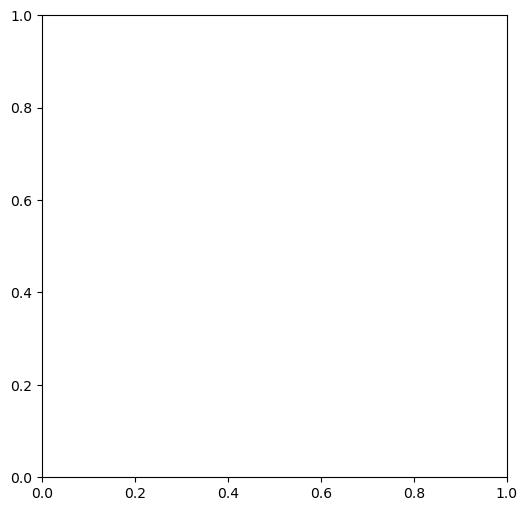

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def rotation_matrix(theta):
    theta_rad = np.radians(theta)
    return np.array([
        [np.cos(theta_rad), -np.sin(theta_rad)],
        [np.sin(theta_rad),  np.cos(theta_rad)]
    ])

def animate_transform(matrix_final, steps=30):
    vectors = np.array([[1, 0], [0, 1], [1, 1], [-1, 0.5]])
    fig, ax = plt.subplots(figsize=(6, 6))
    
    def update(frame):
        ax.clear()
        alpha = frame / steps
        T = (1 - alpha) * np.eye(2) + alpha * matrix_final
        for v in vectors:
            v_t = T @ v
            ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', alpha=0.3)
            ax.quiver(0, 0, v_t[0], v_t[1], angles='xy', scale_units='xy', scale=1, color='r')
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        ax.grid(True)
        ax.axhline(0, color='k', linewidth=0.5)
        ax.axvline(0, color='k', linewidth=0.5)
        ax.set_title(f"Interpolação passo {frame}/{steps}")
        ax.set_aspect('equal', adjustable='box')

    # Mantenha a referência à animação!
    global anim
    anim = FuncAnimation(fig, update, frames=steps + 1, interval=200)
    plt.show()

# Chamada
animate_transform(rotation_matrix(45))


In [12]:
print(type(rotation_matrix))
print(rotation_matrix)


<class 'function'>
<function rotation_matrix at 0x0000019525128900>


## Resumo: O que são Transformações Lineares?

Imagine que todo o espaço 2D é uma folha de borracha mágica. Uma transformação linear é uma forma de esticar, girar ou inclinar essa folha, obedecendo duas regras:

1. Linhas retas continuam retas.
2. A origem (0, 0) permanece fixa.

### Quatro tipos principais de transformações:

| Tipo          | Matriz                                    | Efeito Geométrico                     |
|---------------|--------------------------------------------|----------------------------------------|
| **Escala**     | `[[sx, 0], [0, sy]]`                      | Estica ou encolhe                      |
| **Rotação**    | `[[cosθ, -sinθ], [sinθ, cosθ]]`           | Gira em torno da origem                |
| **Reflexão**   | `[[1, 0], [0, -1]]`, `[[0, 1], [1, 0]]`    | Espelha no eixo x, y ou diagonal       |
| **Cisalhamento** | `[[1, k], [0, 1]]`, `[[1, 0], [k, 1]]`    | Inclina horizontal ou verticalmente    |

### Aplicações práticas:

- **Gráficos de jogos e filmes**
- **Redimensionamento e rotação de imagens**
- **Análise de tensões em engenharia**
- **Transformações de dados em Machine Learning**
